# MSE_test and MSE_train as function of model complexity

In [26]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2

In [27]:
import matplotlib.pyplot as plt
import numpy as np

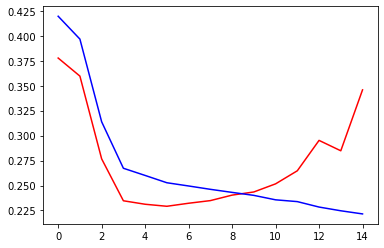

In [28]:
import matplotlib.pyplot as plt
plt.plot(MSE_test, 'r') # test settet gir alltid litt verre estimat ser det ut til
plt.plot(MSE_train, 'b') 
plt.show()

Seed value:  0
Seed value:  1
Seed value:  2
Seed value:  3
Seed value:  4
Seed value:  5
Seed value:  6
Seed value:  7
Seed value:  8
Seed value:  9
Seed value:  10
Seed value:  11


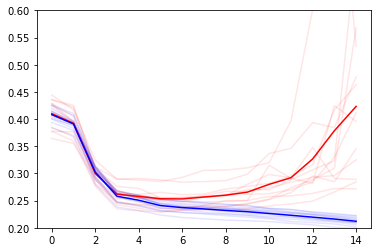

In [29]:
from franke_function import FrankeFunction as Fr
from regression import OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 50) # lite: 50, stort: 500
y = np.linspace(0, 1, 50)
x, y = np.meshgrid(x, y)

poly = 16
MSE_test_list = []
MSE_train_list = []

for n in range(12): #loop thru 15 first seed values
    print("Seed value: ", str(n))
    np.random.seed(n) # Results is highly sensitive to seed choice, for thru different seed values? 
    noise = np.random.randn(x.shape[0], x.shape[1])
    z = Fr(x, y) + noise*np.var(Fr(x, y))*2
    
    scaler = StandardScaler() 
    x_cent = scaler.fit_transform(x.reshape(-1, 1)) #could be done outside loop, here for readability
    y_cent = scaler.fit_transform(y.reshape(-1, 1)) #could be done outside loop, here for readability
    z_cent = scaler.fit_transform(z.reshape(-1, 1))

    xy_cent_train, xy_cent_test, z_cent_train, z_cent_test = train_test_split(np.hstack([x_cent, y_cent]),
                                                                          z_cent, test_size=0.2)
    MSE_test = []
    MSE_train = []
    for poly_deg in range(1, poly):
        model = OLS(xy_cent_train[:, 0].ravel(), xy_cent_train[:, 1].ravel(), z_cent_train.ravel(), poly_deg)
    
        MSE_test.append(model.MSE(xy_cent_test[:, 0], xy_cent_test[:, 1], z_cent_test.ravel()))
        MSE_train.append(model.MSE(xy_cent_train[:, 0], xy_cent_train[:, 1], z_cent_train.ravel())) # orig model.
    
    plt.plot(MSE_test, 'r', alpha=0.1) # test settet gir alltid litt verre estimat ser det ut til
    plt.plot(MSE_train, 'b', alpha=0.1) 
    
    MSE_test_list.append(MSE_test) # sore all values for averaging
    MSE_train_list.append(MSE_train)
    
MSE_test_list = np.array(MSE_test_list)
MSE_train_list = np.array(MSE_train_list)

test_pol_avrg = np.mean(MSE_test_list, axis=0)
train_pol_avrg = np.mean(MSE_train_list, axis=0)

plt.plot(test_pol_avrg, 'r')
plt.plot(train_pol_avrg, 'b')

plt.ylim(0.2, 0.6)
plt.show()
# Observasjonar: 
# Med høyoppløslig grid må eg ha mer støy for at bias variance tradeoff skal oppdages
# Dette kan ha med at med høyoppløslig grid så tvinges funksjonen i større grad å forholde seg til F(x, y)
# , ikkje til støy. (må svinge mykje for å nå alle punkter når dei ligg tettere)Ein kan sjå for seg ein scatter 
#med tett i tett med punkter eller spredde punkter. Dersom  
# pukta ligg tett treng ein meir støy for at polynomet skal over-tilpasse seg. 

# I oppgava: Utled bias variance relation!

In [31]:
(1/(Fr(x, y).size - 1)) * np.sum((Fr(x, y) - np.mean(Fr(x, y)))**2)

0.08251793103703291

# Bootstrap

In [ ]:
# trekk n random tall fra ei data-lista med n observasjoner
# 